# **Emotional Analysis by Hume.Ai**

## Setup and Installation
**Prerequisites**:
- Python
- Matpotlib
- json
- websockets
- hume[stream]


In [ ]:
!pip install websockets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.2 MB/s eta 0:00:00


In [ ]:
!pip install hume[stream]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00


In [ ]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
from hume import HumeBatchClient
from hume.models.config import LanguageConfig

**OVERVIEW**

This script performs sentiment analysis on audio files using the Hume API. It uploads audio files, processes them, and downloads the sentiment analysis predictions.

In [ ]:
from google.colab import userdata
HUME_API=userdata.get("HUME_API")


In [ ]:
# Initialize the Hume client with API key
client = HumeBatchClient(HUME_API)

HUME_API is the API key of hume.ai

**Filepaths and Configuration**

Specify the audio files to analyze and configure the language model:

In [ ]:
filepaths = ["sentiment_audio1.wav"]
# Replace "sentiment_audio1.wav" with the path to your audio file.

config = LanguageConfig()
job = client.submit_job(None, [config], files=filepaths)
print(job)
print("Running...")

details = job.await_complete()
job.download_predictions("predictions.json")
print("Predictions downloaded to predictions.json")


Job(id="dab1ac6c-8f40-444f-b839-0893ba990a27")
Running...
Predictions downloaded to predictions.json


The results are saved in a file named predictions.json.

In [ ]:
data=job.get_predictions()
data

[{'source': {'type': 'file',
   'filename': 'sentiment_audio1.wav',
   'content_type': 'audio/x-wav',
   'md5sum': 'c297b787cf4ab8bdec63817eb8f2125d'},
  'results': {'predictions': [{'file': 'sentiment_audio1.wav',
     'file_type': 'audio',
     'models': {'language': {'metadata': {'confidence': 0.8798828,
        'detected_language': 'en'},
       'grouped_predictions': [{'id': 'unknown',
         'predictions': [{'text': 'Hello.',
           'position': {'begin': 0, 'end': 6},
           'time': {'begin': 1.873221, 'end': 2.1920671},
           'confidence': 0.9916992,
           'speaker_confidence': None,
           'emotions': [{'name': 'Admiration', 'score': 0.012511679902672768},
            {'name': 'Adoration', 'score': 0.008131392300128937},
            {'name': 'Aesthetic Appreciation', 'score': 0.016512393951416016},
            {'name': 'Amusement', 'score': 0.09072694927453995},
            {'name': 'Anger', 'score': 0.0005581928417086601},
            {'name': 'Annoyanc

This script provides functions to print the keys of a JSON object level by level, which is useful for understanding the structure of deeply nested JSON data.

Parameters:

data (dict or list): The JSON data to be processed.

max_levels (int): The maximum number of levels to print.




In [ ]:
import json

def print_json_keys_levelwise(data, max_levels):
    """Prints JSON keys level by level up to a specified maximum number of levels."""
    for level in range(max_levels):
        print(f"Level {level}:")
        print_keys_at_level(data, level)

def print_keys_at_level(data, target_level, current_level=0, indent=0):
    """Recursively prints keys at a specific target level in the JSON data."""
    if current_level > target_level:
        return

    # Check if the data is a dictionary
    if isinstance(data, dict):
        for key, value in data.items():
            if current_level == target_level:
                print(' ' * indent + str(key))
            else:
                print_keys_at_level(value, target_level, current_level + 1, indent + 4)

    # Check if the data is a list
    elif isinstance(data, list):
        for item in data:
            print_keys_at_level(item, target_level, current_level + 1, indent + 4)

# Load the predictions from the previously downloaded file
with open("predictions.json", "r") as f:
    data = json.load(f)

# Print keys level by level up to 4 levels deep
print_json_keys_levelwise(data, max_levels=11)


Level 0:
Level 1:
    source
    results
Level 2:
        type
        filename
        content_type
        md5sum
        predictions
        errors
Level 3:
Level 4:
                file
                file_type
                models
Level 5:
                    language
Level 6:
                        metadata
                        grouped_predictions
Level 7:
                            confidence
                            detected_language
Level 8:
                                id
                                predictions
Level 9:
Level 10:
                                        text
                                        position
                                        time
                                        confidence
                                        speaker_confidence
                                        emotions
                                        sentiment
                                        toxicity
                                       

In [ ]:
data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][0]['emotions'][0].keys()

dict_keys(['name', 'score'])

In [ ]:
data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][0]['confidence']

0.9916992

These are the keys value given in the structure

In [ ]:
data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][0].keys()

dict_keys(['text', 'position', 'time', 'confidence', 'speaker_confidence', 'emotions', 'sentiment', 'toxicity'])

In [ ]:
y=len(data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][3]['emotions'])
#  ['grouped_predictions'][0]['predictions'][0]['emotions']
y

53

The script processes a list of predictions, each containing a confidence score, to compute and print the average confidence score. It includes safeguards for handling cases where confidence scores may be missing or there are no valid predictions.

In [ ]:
# Define the number of predictions
length = len(data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'])

# Initialize variables for sum and count
sum_confidence = 0.0
count_predictions = 0

# Extract and aggregate confidence scores
for i in range(length):
    confidence = data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][i]['confidence']
    if confidence is not None:
        sum_confidence += confidence
        count_predictions += 1

# Calculate average confidence
if count_predictions > 0:
    average_confidence = sum_confidence / count_predictions
else:
    average_confidence = 0.0  # Handle case where there are no predictions with confidence

print(f"Average Confidence: {average_confidence}")


Average Confidence: 0.7711375843181819


 It extracts text values from a JSON data structure, which likely contains sentiment analysis or language model predictions, and then concatenates these text values into a single readable sentence.

In [ ]:

length = len(data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'])

# List to store all text values
all_texts = []

# Extract and aggregate scores for each emotion across all predictions
for i in range(length):
    texts = data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][i]['text']
    all_texts.append(texts)

# print(all_texts)
# Join all_texts into a readable sentence
readable_text = ' '.join(all_texts)

# Print the readable text
readable_text


"Hello. My name is B y, and I would like to apply as one of their accounting associates. I'm have twenty two years old. I've heard my degree bachelor of science and account and did a upset with the mess and recently passed the Cb board exam last October. Hiring getting in package also it's areas such as management marketing or even graphics design. I consider myself a as a team player jobs Hi and those events easily. So if you're interested in hiring me, please call me"

In [ ]:

# Load predictions from the JSON file
with open("predictions.json") as f:
    data = json.load(f)

In [ ]:
x=data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][0]['emotions']
x

[{'name': 'Admiration', 'score': 0.012511679902672768},
 {'name': 'Adoration', 'score': 0.008131392300128937},
 {'name': 'Aesthetic Appreciation', 'score': 0.016512393951416016},
 {'name': 'Amusement', 'score': 0.09072694927453995},
 {'name': 'Anger', 'score': 0.0005581928417086601},
 {'name': 'Annoyance', 'score': 0.014846832491457462},
 {'name': 'Anxiety', 'score': 0.0011913275811821222},
 {'name': 'Awe', 'score': 0.008423075079917908},
 {'name': 'Awkwardness', 'score': 0.06354712694883347},
 {'name': 'Boredom', 'score': 0.108513742685318},
 {'name': 'Calmness', 'score': 0.31933414936065674},
 {'name': 'Concentration', 'score': 0.016252567991614342},
 {'name': 'Confusion', 'score': 0.02989160269498825},
 {'name': 'Contemplation', 'score': 0.02187628112733364},
 {'name': 'Contempt', 'score': 0.01850486733019352},
 {'name': 'Contentment', 'score': 0.08336641639471054},
 {'name': 'Craving', 'score': 0.0006236959015950561},
 {'name': 'Desire', 'score': 0.000760010676458478},
 {'name': 'D

In [ ]:
x=len(data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'])
x

88

# **All Emotions Plot**

Code aggregates emotion scores from sentiment analysis predictions, calculates average scores for each emotion, and plots these averages.

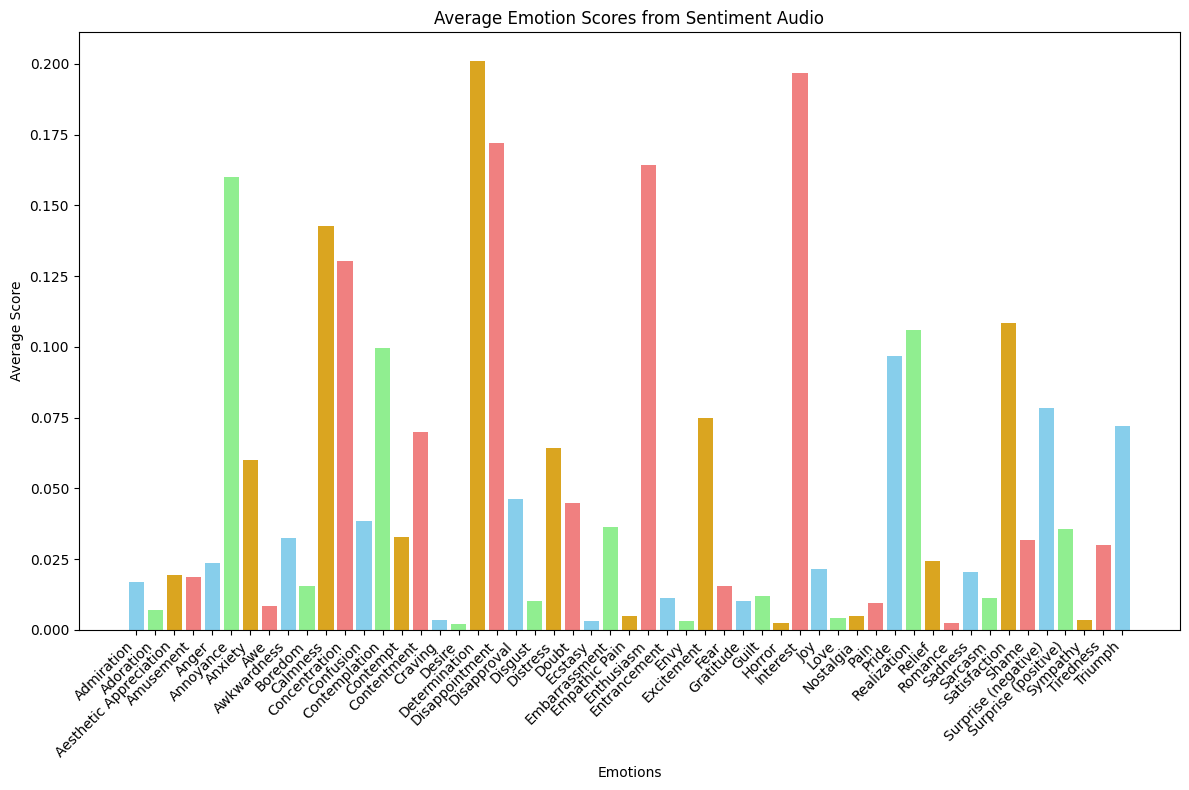

Average Emotion Scores:
- Admiration: 0.0169
- Adoration: 0.0071
- Aesthetic Appreciation: 0.0194
- Amusement: 0.0187
- Anger: 0.0236
- Annoyance: 0.1601
- Anxiety: 0.0599
- Awe: 0.0086
- Awkwardness: 0.0323
- Boredom: 0.0154
- Calmness: 0.1429
- Concentration: 0.1304
- Confusion: 0.0385
- Contemplation: 0.0996
- Contempt: 0.0327
- Contentment: 0.0698
- Craving: 0.0036
- Desire: 0.0019
- Determination: 0.2011
- Disappointment: 0.1721
- Disapproval: 0.0463
- Disgust: 0.0100
- Distress: 0.0642
- Doubt: 0.0449
- Ecstasy: 0.0031
- Embarrassment: 0.0364
- Empathic Pain: 0.0048
- Enthusiasm: 0.1643
- Entrancement: 0.0114
- Envy: 0.0032
- Excitement: 0.0748
- Fear: 0.0156
- Gratitude: 0.0104
- Guilt: 0.0119
- Horror: 0.0025
- Interest: 0.1969
- Joy: 0.0214
- Love: 0.0042
- Nostalgia: 0.0048
- Pain: 0.0093
- Pride: 0.0968
- Realization: 0.1058
- Relief: 0.0245
- Romance: 0.0023
- Sadness: 0.0206
- Sarcasm: 0.0113
- Satisfaction: 0.1084
- Shame: 0.0318
- Surprise (negative): 0.0784
- Surprise (

In [ ]:

x=len(data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'])

emotion_totals = {}
emotion_counts = {}

for i in range(x):
    emotions = data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][i]['emotions']
    for emotion in emotions:
        name = emotion['name']
        score = emotion['score']
        if name in emotion_totals:
            emotion_totals[name] += score
            emotion_counts[name] += 1
        else:
            emotion_totals[name] = score
            emotion_counts[name] = 1

emotion_averages = {name: emotion_totals[name] / emotion_counts[name] for name in emotion_totals}


emotion_names = list(emotion_averages.keys())
emotion_scores = list(emotion_averages.values())

plt.figure(figsize=(12, 8))

plt.bar(emotion_names, emotion_scores, color=['skyblue', 'lightgreen', 'goldenrod', 'lightcoral'])
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.title("Average Emotion Scores from Sentiment Audio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

print("Average Emotion Scores:")
for emotion, score in emotion_averages.items():
    print(f"- {emotion}: {score:.4f}")

Code aggregates emotion scores from sentiment analysis predictions, calculates average scores for each emotion, and plots these averages. Additionally, it includes the previously calculated average confidence score in the output.

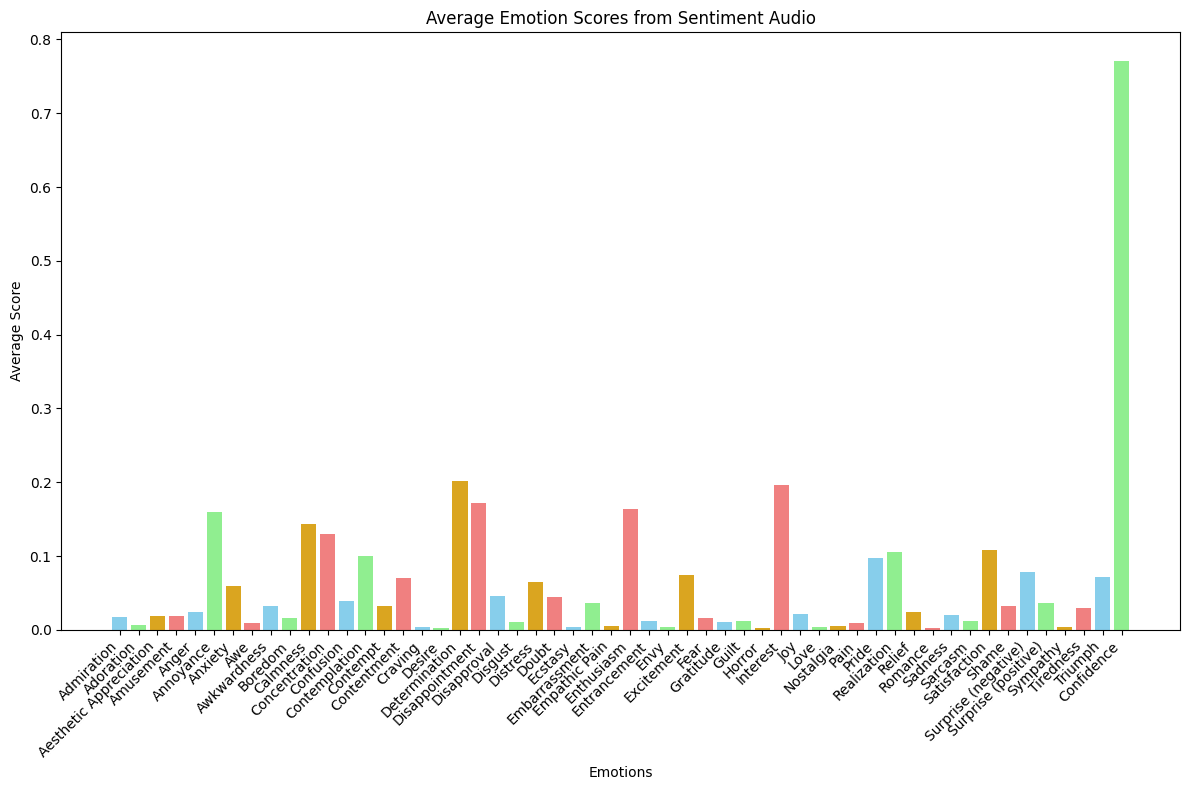

Average Emotion Scores:
- Admiration: 0.0169
- Adoration: 0.0071
- Aesthetic Appreciation: 0.0194
- Amusement: 0.0187
- Anger: 0.0236
- Annoyance: 0.1601
- Anxiety: 0.0599
- Awe: 0.0086
- Awkwardness: 0.0323
- Boredom: 0.0154
- Calmness: 0.1429
- Concentration: 0.1304
- Confusion: 0.0385
- Contemplation: 0.0996
- Contempt: 0.0327
- Contentment: 0.0698
- Craving: 0.0036
- Desire: 0.0019
- Determination: 0.2011
- Disappointment: 0.1721
- Disapproval: 0.0463
- Disgust: 0.0100
- Distress: 0.0642
- Doubt: 0.0449
- Ecstasy: 0.0031
- Embarrassment: 0.0364
- Empathic Pain: 0.0048
- Enthusiasm: 0.1643
- Entrancement: 0.0114
- Envy: 0.0032
- Excitement: 0.0748
- Fear: 0.0156
- Gratitude: 0.0104
- Guilt: 0.0119
- Horror: 0.0025
- Interest: 0.1969
- Joy: 0.0214
- Love: 0.0042
- Nostalgia: 0.0048
- Pain: 0.0093
- Pride: 0.0968
- Realization: 0.1058
- Relief: 0.0245
- Romance: 0.0023
- Sadness: 0.0206
- Sarcasm: 0.0113
- Satisfaction: 0.1084
- Shame: 0.0318
- Surprise (negative): 0.0784
- Surprise (

In [ ]:

# Define the number of predictions
x=len(data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'])

# Initialize a dictionary to store aggregated scores
emotion_totals = {}
emotion_counts = {}

# Extract and aggregate scores for each emotion across all predictions
for i in range(x):
    emotions = data[0]['results']['predictions'][0]['models']['language']['grouped_predictions'][0]['predictions'][i]['emotions']
    for emotion in emotions:
        name = emotion['name']
        score = emotion['score']
        if name in emotion_totals:
            emotion_totals[name] += score
            emotion_counts[name] += 1
        else:
            emotion_totals[name] = score
            emotion_counts[name] = 1

# Calculate the average score for each emotion
emotion_averages = {name: emotion_totals[name] / emotion_counts[name] for name in emotion_totals}

# Update emotion_averages dictionary with Confidence average
emotion_averages.update({'Confidence': average_confidence})

# Prepare data for plotting
emotion_names = list(emotion_averages.keys())
emotion_scores = list(emotion_averages.values())

# Create a bar plot
plt.figure(figsize=(12, 8))

plt.bar(emotion_names, emotion_scores, color=['skyblue', 'lightgreen', 'goldenrod', 'lightcoral'])
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.title("Average Emotion Scores from Sentiment Audio")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Display the plot
plt.show()

# Print the aggregated emotions in a readable format
# Print the average emotions in a readable format
print("Average Emotion Scores:")
for emotion, score in emotion_averages.items():
    print(f"- {emotion}: {score:.4f}")

In [ ]:
# Update emotion_averages dictionary with Confidence average
emotion_averages.update({'Confidence': average_confidence})

# Print or use emotion_averages as needed
emotion_averages


{'Admiration': 0.016885924694096586,
 'Adoration': 0.007144110556427305,
 'Aesthetic Appreciation': 0.01935459629748948,
 'Amusement': 0.01869627334632572,
 'Anger': 0.023557867903119502,
 'Annoyance': 0.1601451096754648,
 'Anxiety': 0.05988312585660341,
 'Awe': 0.008580775119216096,
 'Awkwardness': 0.032286937020465055,
 'Boredom': 0.015408104407304729,
 'Calmness': 0.14288608493304558,
 'Concentration': 0.13044271206440913,
 'Confusion': 0.03850287657008845,
 'Contemplation': 0.09955829500474712,
 'Contempt': 0.0327351611869579,
 'Contentment': 0.06978734368484849,
 'Craving': 0.0036429266763827236,
 'Desire': 0.0019241710031730524,
 'Determination': 0.20112970453126103,
 'Disappointment': 0.17210310000915674,
 'Disapproval': 0.04633680756986988,
 'Disgust': 0.010038075496016641,
 'Distress': 0.0642244984383896,
 'Doubt': 0.04487189197044989,
 'Ecstasy': 0.0031458478378309255,
 'Embarrassment': 0.03639713349614546,
 'Empathic Pain': 0.004776945147155361,
 'Enthusiasm': 0.164344081290

# **Top 10 EMOTIONS**

This code further processes the emotion data by sorting the emotions based on their average scores in descending order and selecting the top 10 emotions. It then visualizes these top emotions using a bar plot and prints them in a readable format.

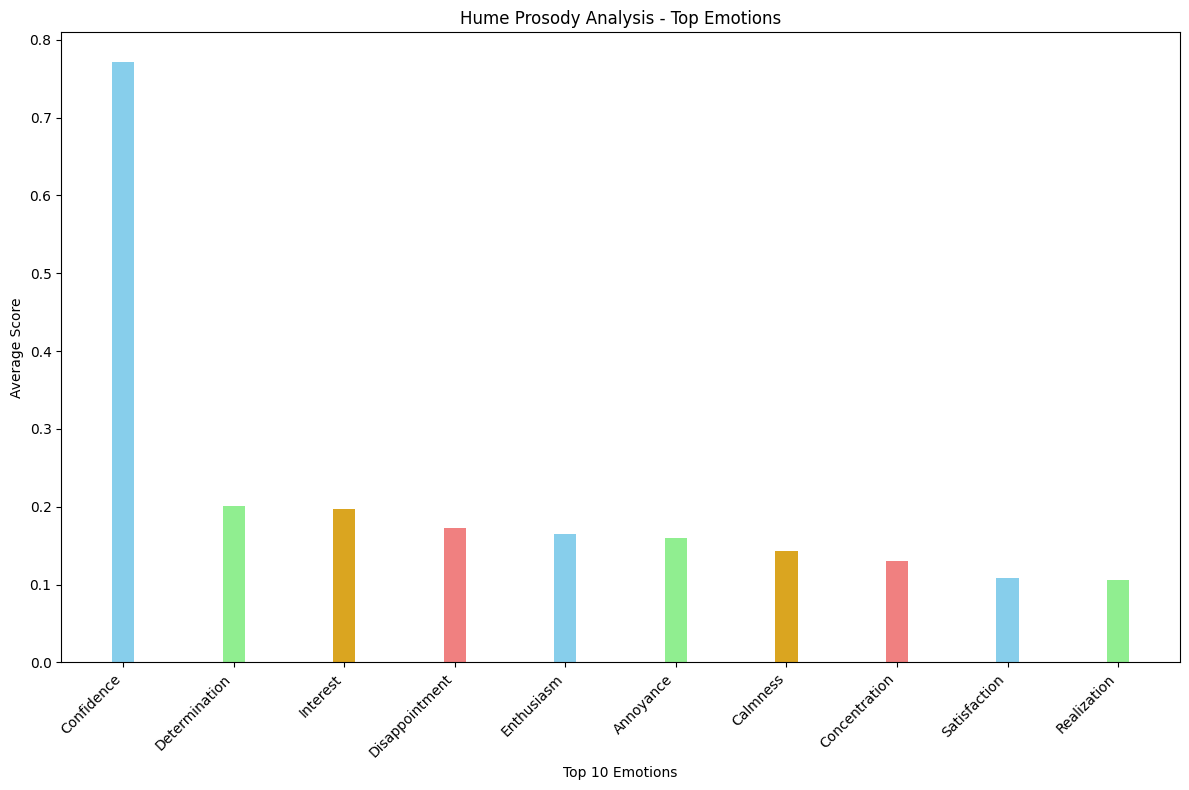

Top 10 Emotion Scores:
- Confidence: 0.7711
- Determination: 0.2011
- Interest: 0.1969
- Disappointment: 0.1721
- Enthusiasm: 0.1643
- Annoyance: 0.1601
- Calmness: 0.1429
- Concentration: 0.1304
- Satisfaction: 0.1084
- Realization: 0.1058


In [ ]:

# Sort the emotions by average score in descending order and select the top 10
sorted_emotions = sorted(emotion_averages.items(), key=lambda item: item[1], reverse=True)[:10]

# Extract the names and scores of the top 10 emotions
emotion_labels = [emotion[0] for emotion in sorted_emotions]
emotion_scores = [emotion[1] for emotion in sorted_emotions]

plt.figure(figsize=(12, 8))
bar_width = 0.2
plt.bar(emotion_labels, emotion_scores, color=['skyblue', 'lightgreen', 'goldenrod', 'lightcoral'], width=bar_width)
plt.xlabel("Top 10 Emotions")
plt.ylabel("Average Score")
plt.title("Hume Prosody Analysis - Top Emotions")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Display the plot
plt.show()

# Print the top 10 emotions in a readable format
print("Top 10 Emotion Scores:")
for name, score in sorted_emotions:
    print(f"- {name}: {score:.4f}")

In [ ]:
emotion_averages.keys()

dict_keys(['Admiration', 'Adoration', 'Aesthetic Appreciation', 'Amusement', 'Anger', 'Annoyance', 'Anxiety', 'Awe', 'Awkwardness', 'Boredom', 'Calmness', 'Concentration', 'Confusion', 'Contemplation', 'Contempt', 'Contentment', 'Craving', 'Desire', 'Determination', 'Disappointment', 'Disapproval', 'Disgust', 'Distress', 'Doubt', 'Ecstasy', 'Embarrassment', 'Empathic Pain', 'Enthusiasm', 'Entrancement', 'Envy', 'Excitement', 'Fear', 'Gratitude', 'Guilt', 'Horror', 'Interest', 'Joy', 'Love', 'Nostalgia', 'Pain', 'Pride', 'Realization', 'Relief', 'Romance', 'Sadness', 'Sarcasm', 'Satisfaction', 'Shame', 'Surprise (negative)', 'Surprise (positive)', 'Sympathy', 'Tiredness', 'Triumph', 'Confidence'])

# **Desired Emotions**

This code filters, sorts, and visualizes specific emotions of interest from sentiment analysis data. It focuses on a predefined list of desired emotions, calculates their average scores, and then plots and prints these scores.

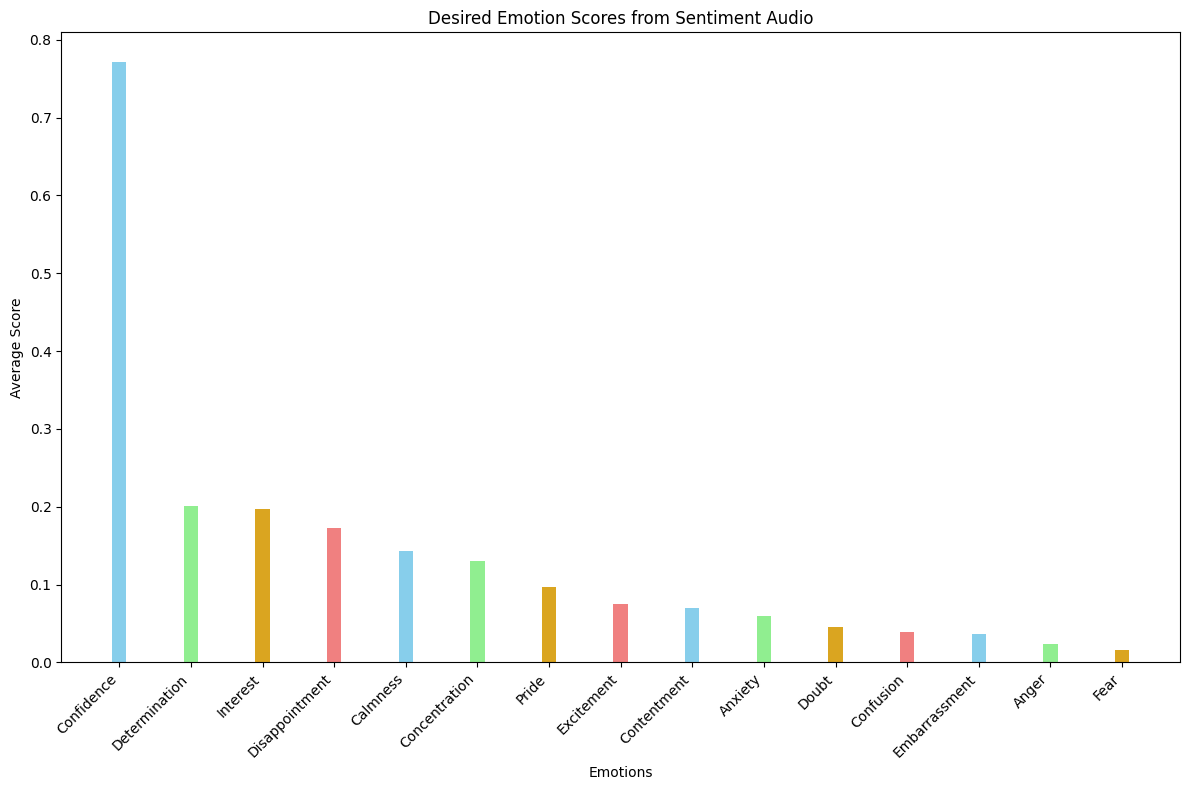

Filtered Desired Emotion Scores:
- Confidence: 0.7711
- Determination: 0.2011
- Interest: 0.1969
- Disappointment: 0.1721
- Calmness: 0.1429
- Concentration: 0.1304
- Pride: 0.0968
- Excitement: 0.0748
- Contentment: 0.0698
- Anxiety: 0.0599
- Doubt: 0.0449
- Confusion: 0.0385
- Embarrassment: 0.0364
- Anger: 0.0236
- Fear: 0.0156


In [ ]:

desired_emotions = [
    "Confidence",
    "Pride",
    "Calmness",
    "Interest",
    "Excitement",
    "Concentration",

    "Contentment",
    "Determination",
    "Anxiety",



    "Fear",
    "Embarrassment",
    "Doubt",
    "Anger",
    "Disappointment",
    "Confusion"

]


# Filter for desired emotions
filtered_emotion_averages = {name: emotion_averages[name] for name in desired_emotions if name in emotion_averages}

# Sort the filtered emotions by average score in descending order
sorted_emotions = sorted(filtered_emotion_averages.items(), key=lambda item: item[1], reverse=True)

# Extract the names and scores of the sorted emotions
sorted_emotion_names = [emotion[0] for emotion in sorted_emotions]
sorted_emotion_scores = [emotion[1] for emotion in sorted_emotions]

# Create a bar plot for the filtered desired emotions
plt.figure(figsize=(12, 8))
bar_width = 0.2
plt.bar(sorted_emotion_names, sorted_emotion_scores,color=['skyblue', 'lightgreen', 'goldenrod', 'lightcoral'], width=bar_width)
plt.xlabel("Emotions")
plt.ylabel("Average Score")
plt.title("Desired Emotion Scores from Sentiment Audio")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()


# Display the plot
plt.show()
# Print the filtered desired emotions in a readable format
print("Filtered Desired Emotion Scores:")
for name, score in sorted_emotions:
    print(f"- {name}: {score:.4f}")

In [ ]:
# Print the filtered desired emotions in a readable format
print("Filtered Desired Emotion Scores:")
for name,score in filtered_emotion_averages.items():
    print(f"- {name}: {score:.4f}")

Filtered Desired Emotion Scores:
- Confidence: 0.7711
- Pride: 0.0968
- Calmness: 0.1429
- Interest: 0.1969
- Excitement: 0.0748
- Concentration: 0.1304
- Contentment: 0.0698
- Determination: 0.2011
- Anxiety: 0.0599
- Fear: 0.0156
- Embarrassment: 0.0364
- Doubt: 0.0449
- Anger: 0.0236
- Disappointment: 0.1721
- Confusion: 0.0385


In [ ]:
from pydub import AudioSegment

# Load an audio file

audio = AudioSegment.from_file("/content/sentiment_audio1.wav")

# Slicing
slice = audio[3000:7000]  # Extracts audio from 1s to 3s
last_second = audio[-1000:]  # Extracts the last second of audio

slice.export("example.wav", format="wav")


<_io.BufferedRandom name='example.wav'>

In [ ]:
import asyncio
from hume import HumeStreamClient
from hume.models.config import LanguageConfig

samples = [
  "Mary had a little lamb,",
  "Its fleece was white as snow.",
  "Everywhere the child went,",
  "The little lamb was sure to go."
]

async def main():
  client = HumeStreamClient("jlqoGjDMn0iw5VAusmsryqtauBTbqGNuYGfumA7PR7Jh1qjC")
  config = LanguageConfig()
  async with client.connect([config]) as socket:
    for sample in samples:
      result = await socket.send_text(sample)
      emotions = result["language"]["predictions"][0]["emotions"]
      print(emotions)

# Run the coroutine directly with await
await main()


[{'name': 'Admiration', 'score': 0.0637924075126648}, {'name': 'Adoration', 'score': 0.07222927361726761}, {'name': 'Aesthetic Appreciation', 'score': 0.028084464371204376}, {'name': 'Amusement', 'score': 0.02758903056383133}, {'name': 'Anger', 'score': 0.0120259253308177}, {'name': 'Annoyance', 'score': 0.02565314993262291}, {'name': 'Anxiety', 'score': 0.004923965781927109}, {'name': 'Awe', 'score': 0.02503134310245514}, {'name': 'Awkwardness', 'score': 0.061385150998830795}, {'name': 'Boredom', 'score': 0.05333973839879036}, {'name': 'Calmness', 'score': 0.13555721938610077}, {'name': 'Concentration', 'score': 0.010018940083682537}, {'name': 'Confusion', 'score': 0.0911511704325676}, {'name': 'Contemplation', 'score': 0.020809857174754143}, {'name': 'Contempt', 'score': 0.030744818970561028}, {'name': 'Contentment', 'score': 0.06075143441557884}, {'name': 'Craving', 'score': 0.008604105561971664}, {'name': 'Determination', 'score': 0.010685046203434467}, {'name': 'Disappointment', '

In [ ]:
import asyncio
import matplotlib.pyplot as plt

In [ ]:
import asyncio

from hume import HumeStreamClient, StreamSocket
from hume.models.config import ProsodyConfig

async def main():
    client = HumeStreamClient("jlqoGjDMn0iw5VAusmsryqtauBTbqGNuYGfumA7PR7Jh1qjC")
    config = ProsodyConfig()
    async with client.connect([config]) as socket:
        result = await socket.send_file("example.wav")
        print(result)
        return result




In [ ]:
# Run the coroutine directly with await
await main()
# asyncio.run(main())


{'prosody': {'predictions': [{'time': {'begin': 1.0, 'end': 4.0}, 'emotions': [{'name': 'Admiration', 'score': 0.1138739287853241}, {'name': 'Adoration', 'score': 0.036501046270132065}, {'name': 'Aesthetic Appreciation', 'score': 0.03168844059109688}, {'name': 'Amusement', 'score': 0.09642258286476135}, {'name': 'Anger', 'score': 0.07453259080648422}, {'name': 'Anxiety', 'score': 0.00897405669093132}, {'name': 'Awe', 'score': 0.010157830081880093}, {'name': 'Awkwardness', 'score': 0.017881397157907486}, {'name': 'Boredom', 'score': 0.0414864718914032}, {'name': 'Calmness', 'score': 0.08802781254053116}, {'name': 'Concentration', 'score': 0.23599308729171753}, {'name': 'Contemplation', 'score': 0.09055917710065842}, {'name': 'Confusion', 'score': 0.008957852609455585}, {'name': 'Contempt', 'score': 0.1727016121149063}, {'name': 'Contentment', 'score': 0.0401136577129364}, {'name': 'Craving', 'score': 0.05903125926852226}, {'name': 'Determination', 'score': 0.32943952083587646}, {'name':

{'prosody': {'predictions': [{'time': {'begin': 1.0, 'end': 4.0},
    'emotions': [{'name': 'Admiration', 'score': 0.1138739287853241},
     {'name': 'Adoration', 'score': 0.036501046270132065},
     {'name': 'Aesthetic Appreciation', 'score': 0.03168844059109688},
     {'name': 'Amusement', 'score': 0.09642258286476135},
     {'name': 'Anger', 'score': 0.07453259080648422},
     {'name': 'Anxiety', 'score': 0.00897405669093132},
     {'name': 'Awe', 'score': 0.010157830081880093},
     {'name': 'Awkwardness', 'score': 0.017881397157907486},
     {'name': 'Boredom', 'score': 0.0414864718914032},
     {'name': 'Calmness', 'score': 0.08802781254053116},
     {'name': 'Concentration', 'score': 0.23599308729171753},
     {'name': 'Contemplation', 'score': 0.09055917710065842},
     {'name': 'Confusion', 'score': 0.008957852609455585},
     {'name': 'Contempt', 'score': 0.1727016121149063},
     {'name': 'Contentment', 'score': 0.0401136577129364},
     {'name': 'Craving', 'score': 0.059031

In [ ]:
for emotion in emotions:
  print(f"- {emotion['name']}")  # Format score to 4 decimal places

- Admiration
- Adoration
- Aesthetic Appreciation
- Amusement
- Anger
- Anxiety
- Awe
- Awkwardness
- Boredom
- Calmness
- Concentration
- Contemplation
- Confusion
- Contempt
- Contentment
- Craving
- Determination
- Disappointment
- Disgust
- Distress
- Doubt
- Ecstasy
- Embarrassment
- Empathic Pain
- Entrancement
- Envy
- Excitement
- Fear
- Guilt
- Horror
- Interest
- Joy
- Love
- Nostalgia
- Pain
- Pride
- Realization
- Relief
- Romance
- Sadness
- Satisfaction
- Desire
- Shame
- Surprise (negative)
- Surprise (positive)
- Sympathy
- Tiredness
- Triumph


In [ ]:
!pip install speechbrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1
    Uninstalling torch-1.12.1:
      Successfully uninstalled torch-1.12.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
huggingsound 0.1.6 requires torch!=1.12.0,<1.13.0,>=1.7, but you have torch 2.3.0 which is incompatible.


In [ ]:
import torchaudio
from speechbrain.inference.speaker import EncoderClassifier

In [ ]:

classifier = EncoderClassifier.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb")



In [ ]:
signal, fs =torchaudio.load('aud3.aac')


In [ ]:
signal

tensor([[ 0.0000,  0.0000,  0.0000,  ..., -0.3527, -0.3377, -0.2982]])

In [ ]:
signal.shape

torch.Size([1, 629760])

In [ ]:
fs

16000

In [ ]:
embeddings = classifier.encode_batch(signal)

In [ ]:
embeddings

tensor([[[ 1.4899e+01,  1.0902e+01, -1.2889e+01,  3.0654e+00, -2.4794e+00,
           1.4772e+01,  1.3359e+00, -2.8543e+01, -4.1359e+01,  9.2084e+00,
           1.8537e+01,  2.8430e+01,  6.0689e+00, -5.1286e+00,  9.0048e-01,
           1.2575e+01, -1.6601e+01,  7.0681e+00, -2.9415e+01, -4.5506e+00,
          -1.5597e+01,  1.1330e+01,  5.2825e+00,  8.6260e+00,  7.5041e+00,
           5.3698e+00,  6.5496e+00,  1.2577e+00, -5.1982e+00,  2.6142e+01,
           9.6812e+00,  6.4925e+00, -3.5754e+01, -1.6911e+01, -1.0362e+01,
          -1.6192e+00, -5.2356e+00, -1.9105e+01, -3.6311e+00,  3.2228e+00,
          -1.2642e+01, -6.6683e+00,  1.0541e+00, -1.0947e+01, -1.7646e+01,
          -1.2816e+01,  3.0832e+00,  5.2251e+00,  2.1966e+01, -7.0609e+00,
           1.2193e-02, -1.1654e+01,  8.6848e+00,  7.5130e+00, -6.3333e+00,
           8.2844e-01,  5.4993e+00, -1.3607e+01,  2.9360e+01, -2.1421e+01,
           1.1420e+01,  1.4837e+01, -3.3336e+01, -1.7190e+01,  2.0539e+01,
          -2.6511e+01,  5

tensor=(batch, time_steps, channels[optional])

In [ ]:
embeddings.shape

torch.Size([1, 1, 192])

In [ ]:
from speechbrain.inference.interfaces import foreign_class
classifier = foreign_class(source="speechbrain/emotion-recognition-wav2vec2-IEMOCAP", pymodule_file="custom_interface.py", classname="CustomEncoderWav2vec2Classifier")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream 

In [ ]:
out_prob, score, index, text_lab = classifier.classify_file("speechbrain/emotion-recognition-wav2vec2-IEMOCAP/anger.wav")
print(text_lab)

['ang']


In [ ]:
print(text_lab)
print(out_prob)
print(score)

['ang']
tensor([[5.3729e-12, 1.0000e+00, 6.1062e-13, 1.6608e-13]])
tensor([1.])


In [ ]:
out_prob, score, index, text_lab = classifier.classify_file("1001_IEO_ANG_LO.wav")
print(text_lab)

['neu']


In [ ]:
  /content/aud3.aac

In [ ]:

import soundfile as sf

# Load the model and processor
model_name = "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name)
processor = Wav2Vec2Processor.from_pretrained(model_name)




Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-e

OSError: Can't load tokenizer for 'ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition' is the correct path to a directory containing all relevant files for a Wav2Vec2CTCTokenizer tokenizer.

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:

from transformers import Wav2Vec2ForSequenceClassification, Wav2Vec2Processor, Wav2Vec2FeatureExtractor

In [ ]:

model_name = "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name)

Some weights of the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition were not used when initializing Wav2Vec2ForSequenceClassification: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.output.bias', 'classifier.output.weight', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at ehcalabres/wav2vec2-lg-xlsr-e

In [ ]:
import soundfile as sf

In [ ]:

audio_input, _ = sf.read("1001_IEO_HAP_HI.wav")

inputs = feature_extractor(audio_input, sampling_rate=16000, return_tensors="pt", padding=True)



In [ ]:
audio_input.shape

(28295,)

In [ ]:
inputs

{'input_values': tensor([[-0.0123, -0.0242, -0.0133,  ..., -0.0003, -0.0003, -0.0003]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)}

In [ ]:
inputs.input_values

tensor([[-0.0123, -0.0242, -0.0133,  ..., -0.0003, -0.0003, -0.0003]])

In [ ]:
inputs.input_values.shape

torch.Size([1, 28295])

In [ ]:
with torch.no_grad():
    logits = model(**inputs).logits



In [ ]:
logits

tensor([[-0.0215,  0.0394, -0.0670,  0.0987, -0.0338, -0.0732,  0.0435,  0.0417]])

In [ ]:
predicted_ids = torch.argmax(logits, dim=-1)


In [ ]:
predicted_ids

tensor([3])

In [ ]:
emotions = ["Anger", "Disgust", "Fear", "Happiness", "Neutral", "Sadness", "Surprise"]


In [ ]:
predicted_emotion = emotions[predicted_ids.item()]

print(f"Predicted emotion: {predicted_emotion}")

Predicted emotion: Happiness


In [ ]:
import torch.nn.functional as F

In [ ]:

# Calculate softmax probabilities
scores = F.softmax(logits, dim=1).detach().cpu().numpy()[0]

# Debugging: Print the shape of scores and length of emotions
print(f"Shape of scores: {scores.shape}")
print(f"Number of emotions: {len(emotions)}")

# Generate output with emotions and corresponding scores
outputs = [{"Emotion": emotions[i], "Score": f"{round(score * 100, 3):.1f}%"} for i, score in enumerate(scores[:len(emotions)])]

# Print the results
for output in outputs:
    print(f"Emotion: {output['Emotion']}, Score: {output['Score']}")


Shape of scores: (8,)
Number of emotions: 7
Emotion: Anger, Score: 12.2%
Emotion: Disgust, Score: 12.9%
Emotion: Fear, Score: 11.6%
Emotion: Happiness, Score: 13.7%
Emotion: Neutral, Score: 12.0%
Emotion: Sadness, Score: 11.6%
Emotion: Surprise, Score: 13.0%


In [ ]:
outputs

[{'Emotion': 'Anger', 'Score': '12.2%'},
 {'Emotion': 'Disgust', 'Score': '12.9%'},
 {'Emotion': 'Fear', 'Score': '11.6%'},
 {'Emotion': 'Happiness', 'Score': '13.7%'},
 {'Emotion': 'Neutral', 'Score': '12.0%'},
 {'Emotion': 'Sadness', 'Score': '11.6%'},
 {'Emotion': 'Surprise', 'Score': '13.0%'}]

In [ ]:

# Calculate softmax probabilities
probabilities = F.softmax(logits, dim=1).detach().cpu().numpy()[0]


# Generate output with emotions and corresponding scores
outputs = [{"Emotion": emotion, "Score": f"{round(probability * 100, 1):.1f}%"} for emotion, probability in zip(emotions, probabilities)]

# Print the results
for output in outputs:
    print(f"Emotion: {output['Emotion']}, Score: {output['Score']}")

Emotion: Anger, Score: 12.2%
Emotion: Disgust, Score: 12.9%
Emotion: Fear, Score: 11.6%
Emotion: Happiness, Score: 13.7%
Emotion: Neutral, Score: 12.0%
Emotion: Sadness, Score: 11.6%
Emotion: Surprise, Score: 13.0%


In [ ]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Verify internet connectivity and try a different model if necessary
tokenizer = AutoTokenizer.from_pretrained("ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition")  # Try a different model
model = AutoModelForSequenceClassification.from_pretrained("facebook/wav2vec2-base")

In [ ]:
!pip install huggingsound


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.3/214.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 548.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.3.0+cu121
    Uninstalling torch-2.3.0+cu121:
      Successfully uninstalled torch-2.3.0+cu121
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling

In [ ]:
import torch


In [ ]:
!pip install transformers

In [ ]:
!pip install tokenizers

In [ ]:
!pip install transformers --upgrade

In [ ]:
import transformers

In [ ]:
import transformers
print(transformers.__version__)

4.41.2


In [ ]:
from transformers import Wav2Vec2ForSpeechClassification

ImportError: cannot import name 'Wav2Vec2ForSpeechClassification' from 'transformers' (/usr/local/lib/python3.10/dist-packages/transformers/__init__.py)

In [ ]:
from transformers import Wav2Vec2ForSpeechClassification

/usr/local/lib/python3.10/dist-packages/transformers/deepspeed.py:23: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


In [ ]:
from transformers import AutoConfig, Wav2Vec2FeatureExtractor

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name_or_path = "m3hrdadfi/wav2vec2-xlsr-greek-speech-emotion-recognition"


In [ ]:
config = AutoConfig.from_pretrained(model_name_or_path)
processor = Wav2Vec2Processor.from_pretrained(model_name_or_path)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:364: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
sampling_rate = processor.feature_extractor.sampling_rate
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)

NameError: name 'Wav2Vec2ForSpeechClassification' is not defined

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_name_or_path = "m3hrdadfi/wav2vec2-xlsr-greek-speech-emotion-recognition"
config = AutoConfig.from_pretrained(model_name_or_path)
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained(model_name_or_path)
sampling_rate = feature_extractor.sampling_rate
model = Wav2Vec2ForSpeechClassification.from_pretrained(model_name_or_path).to(device)


NameError: name 'Wav2Vec2ForSpeechClassification' is not defined